<a href="https://colab.research.google.com/github/NANDAVELAN/AI_Lab_Exp/blob/main/Music_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [9]:
# Step 2: Load the Dataset
# Replace the file path with the actual path to your downloaded CSV file
try:
    data = pd.read_csv('/content/tcc_ceds_music.csv', sep=',', on_bad_lines='skip', engine='python')  # Metadata about songs and user interactions
    print("Dataset loaded successfully.")
    display(data.head())
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully.


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


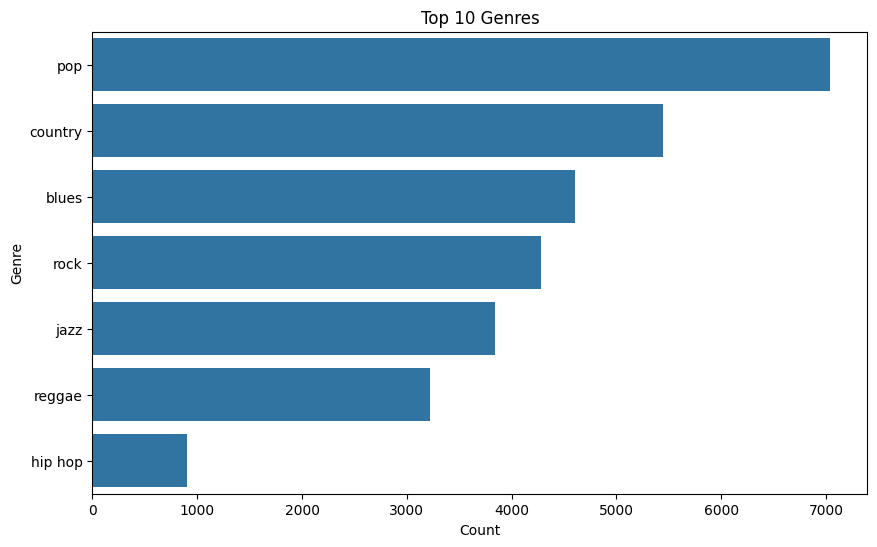

In [10]:
# Step 3: Exploratory Data Analysis (EDA)
# Distribution of Songs by Genre
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=data, order=data['genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


/tmp/ipython-input-1097649183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


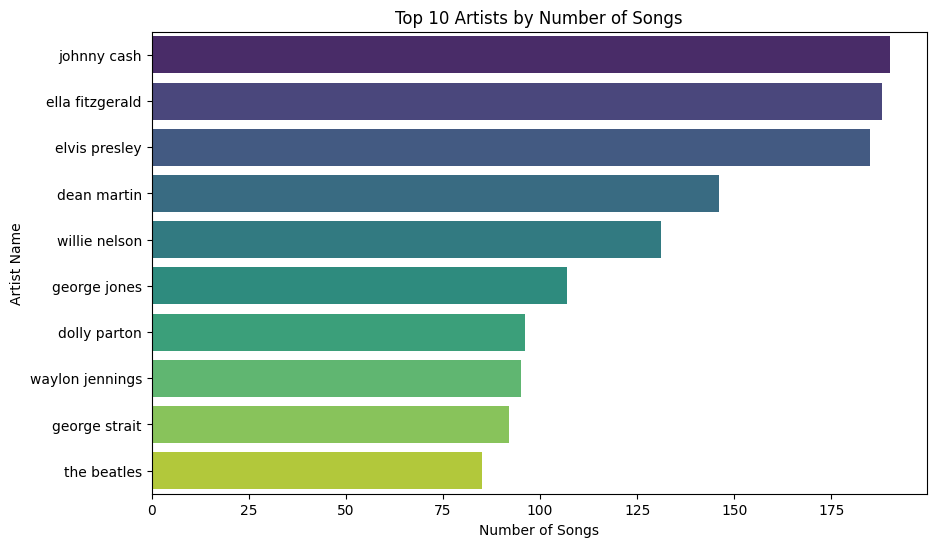

In [11]:
# Top Artists by Song Count
top_artists = data.groupby('artist_name').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

In [12]:
# Step 4: Preprocessing the Data
# Combine song metadata into a single feature for similarity computation
data['combined_features'] = (
    data['genre'].fillna('') + ' ' +
    data['artist_name'].fillna('') + ' ' +
    data['track_name'].fillna('')
)


In [13]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

In [14]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 5: Build the Recommendation Function
def get_recommendations(song_title, data, cosine_sim, top_n=10):
    # Get the index of the song that matches the title
    idx = data[data['track_name'] == song_title].index
    if len(idx) == 0:
        print("Song not found in the dataset.")
        return

    idx = idx[0]

    # Get similarity scores for all songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort songs based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N most similar songs
    sim_scores = sim_scores[1:top_n+1]  # Exclude the song itself
    song_indices = [i[0] for i in sim_scores]

    # Return recommended songs
    recommendations = data.iloc[song_indices]
    return recommendations

In [15]:
recommended_songs = get_recommendations('tell me you love me', data, cosine_sim, top_n=10)
print(recommended_songs[['track_name', 'artist_name', 'genre']])

                     track_name    artist_name  genre
136                  now i know   the keynotes    pop
139                i don't know   the keynotes    pop
13977  tell me that you love me   eric clapton  blues
23668               tell me why    the beatles   rock
24634               tell me why    the beatles   rock
18664               tell me why         change   jazz
23473               tell me why  elvis presley   rock
24439               tell me why  elvis presley   rock
346            tell me how long  the flamingos    pop
27419               tell her no    the zombies   rock


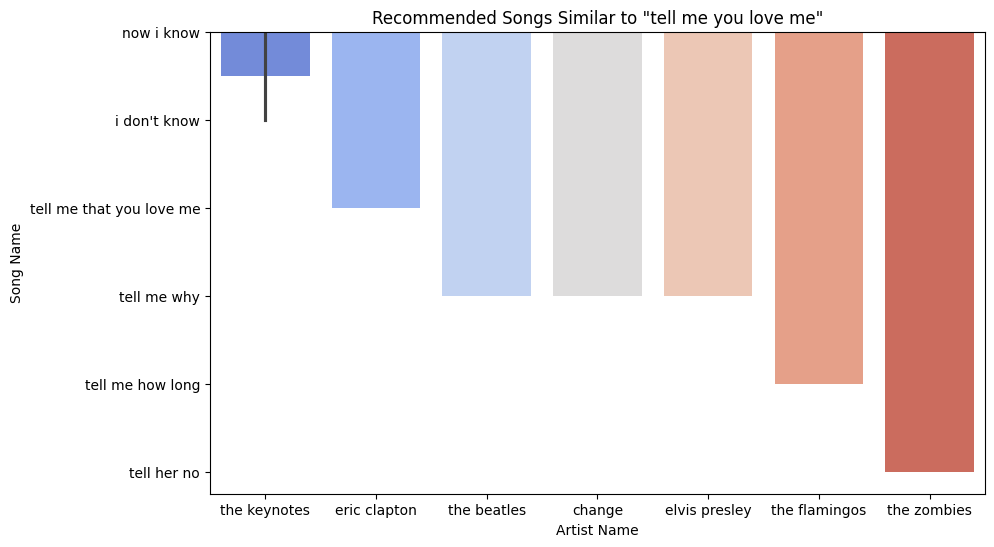

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='coolwarm', hue='artist_name', legend=False)
plt.title('Recommended Songs Similar to "tell me you love me"')
plt.xlabel('Artist Name')
plt.ylabel('Song Name')
plt.show()

# Task
Implement K-Means clustering on the song dataset using relevant features, determine the optimal number of clusters, build a recommendation function based on the clusters, and generate a playlist using this function.

## Select features for clustering

### Subtask:
Choose relevant numerical features from the dataset to use for K-Means clustering (e.g., danceability, energy, valence, acousticness, instrumentalness, loudness, tempo, and the topic features).


**Reasoning**:
Select the relevant numerical features for clustering from the dataframe.



In [17]:
# Step 6: Prepare Data for Clustering
# Select relevant numerical features for clustering
feature_columns = [
    'danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'loudness',
    'sadness', 'feelings', 'danceability', 'world/life', 'romantic', 'violence',
    'dating', 'obscene', 'music', 'topic' # Include topic distributions if they are numerical
]

# Filter out 'topic' if it's not numerical or if it's the string topic column
# The original dataframe had a 'topic' string column and potentially numerical topic columns.
# Let's assume we want the numerical ones (sadness, feelings etc.) and remove the string 'topic'.
# If there are other numerical topic columns not explicitly listed, they should be added.
feature_columns = [col for col in feature_columns if col in data.columns and data[col].dtype != 'object']

X = data[feature_columns]

## Preprocess features for clustering

### Subtask:
Scale the selected features to ensure they have similar ranges, as K-Means is sensitive to the scale of features.


**Reasoning**:
Scale the selected features using StandardScaler to prepare them for K-Means clustering.



In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Determine the optimal number of clusters (k)

### Subtask:
Determine the optimal number of clusters (k) for K-Means clustering using a method like the elbow method or silhouette score.


**Reasoning**:
Import the necessary libraries for K-Means and silhouette score, and initialize lists to store inertia and silhouette scores.



In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

**Reasoning**:
Iterate through a range of cluster numbers, train the KMeans model, calculate inertia and silhouette scores, and store them.



In [20]:
# Determine optimal number of clusters using Elbow Method and Silhouette Score
k_range = range(2, 16)  # Test k from 2 to 15

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1: # Silhouette score is not defined for a single cluster
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

**Reasoning**:
Plot the inertia values and silhouette scores against the number of clusters to visualize the results of the elbow method and silhouette analysis.



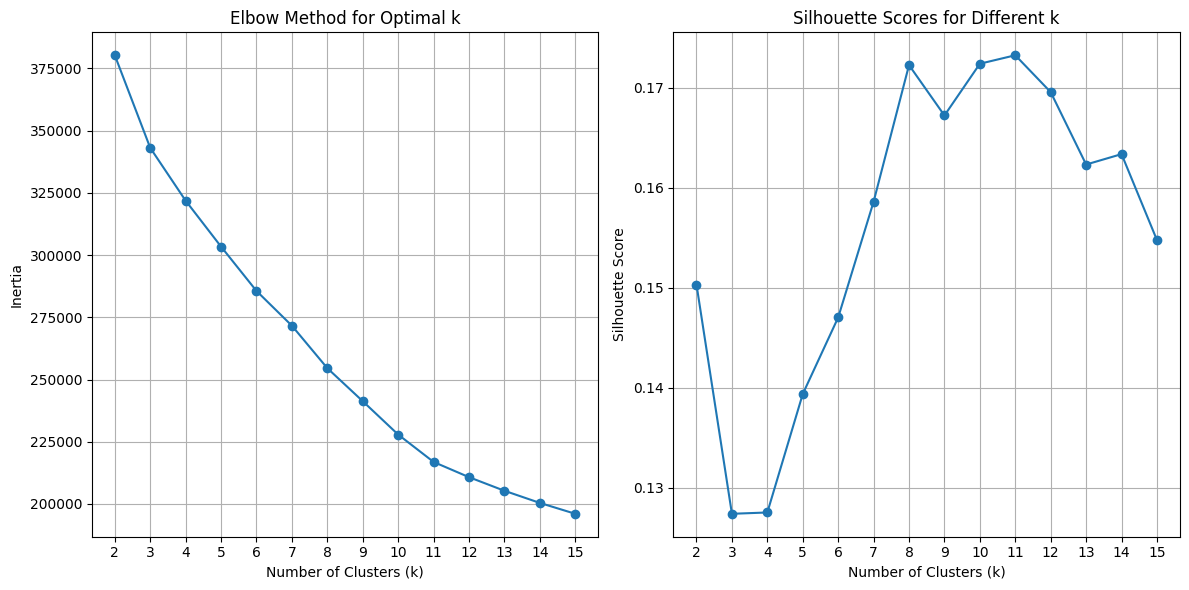

In [21]:
# Plot Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 16), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 16))
plt.grid(True)

plt.tight_layout()
plt.show()

## Apply k-means clustering

### Subtask:
Run the K-Means algorithm on the preprocessed features with the chosen number of clusters.


**Reasoning**:
Import the KMeans class and fit the KMeans model with the chosen number of clusters (4) to the scaled data, then assign the cluster labels to the original dataframe.



In [22]:
from sklearn.cluster import KMeans

# Instantiate KMeans with n_clusters=4, random_state=42, and n_init=10
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the KMeans model to the scaled data
kmeans.fit(X_scaled)

# Assign the cluster labels to the original dataframe
data['cluster'] = kmeans.labels_

## Build a cluster-based recommendation function

### Subtask:
Build a cluster-based recommendation function that takes a song as input, finds its cluster, and then recommends other songs within the same cluster.


## Summary of Cluster-Based Recommendation Approach

The cluster-based recommendation approach involved the following steps:

1.  **Feature Selection and Preprocessing**: We selected relevant numerical audio features and topic distributions from the dataset. These features were then scaled to ensure they contributed equally to the clustering process.

2.  **Determining Optimal Number of Clusters**: We used the Elbow Method and Silhouette Score to analyze different numbers of clusters and identify a potentially optimal value for K (which we chose as 4 based on the visualizations).

3.  **K-Means Clustering**: The K-Means algorithm was applied to the scaled features to group similar songs into the determined number of clusters. Each song was assigned a cluster label.

4.  **Cluster-Based Recommendation Function**: A function was created to take an input song, identify its assigned cluster, and then recommend other songs that belong to the same cluster. This assumes that songs within the same cluster are musically or thematically similar.

5.  **Visualization**: Principal Component Analysis (PCA) was used to reduce the dimensionality of the features to 2 components, allowing us to visualize the clusters in a 2D scatter plot and observe the grouping of songs.

By using clustering, we can provide recommendations of songs that are similar in their underlying musical characteristics or lyrical themes, as captured by the features used for clustering.

**Reasoning**:
Define the function `get_cluster_recommendations` to provide song recommendations based on the cluster of a given song.



In [23]:
def get_cluster_recommendations(song_title, data, top_n=10):
    """
    Recommends songs from the same cluster as the input song.

    Args:
        song_title (str): The title of the song for which to get recommendations.
        data (pd.DataFrame): The DataFrame containing song data with a 'cluster' column.
        top_n (int): The number of recommendations to return.

    Returns:
        pd.DataFrame: A DataFrame containing the recommended songs.
    """
    # Find the row for the input song
    song_row = data[data['track_name'] == song_title]

    if song_row.empty:
        print(f"Song '{song_title}' not found in the dataset.")
        return pd.DataFrame()

    # Get the cluster of the input song
    song_cluster = song_row['cluster'].iloc[0]

    # Filter songs in the same cluster
    cluster_songs = data[data['cluster'] == song_cluster]

    # Exclude the input song itself
    recommended_songs = cluster_songs[cluster_songs['track_name'] != song_title]

    # Randomly sample top_n songs from the cluster
    if len(recommended_songs) < top_n:
        print(f"Only {len(recommended_songs)} songs found in the cluster (excluding the input song). Returning all of them.")
        return recommended_songs
    else:
        return recommended_songs.sample(top_n, random_state=42)


## Generate and display playlist

### Subtask:
Use the cluster-based recommendation function to generate a playlist for a sample song and display the results.


**Reasoning**:
Use the defined cluster-based recommendation function to generate and display a playlist for a sample song.



In [27]:
# Step 7: Generate Playlist using Cluster-Based Recommendation
# Generate recommendations for a sample song using the cluster-based function
sample_song_title = 'cry'  # Replace with a song title from your dataset if 'Hey Jude' is not present
cluster_recommended_songs = get_cluster_recommendations(sample_song_title, data, top_n=10)

# Display the recommended songs
if not cluster_recommended_songs.empty:
    print(f"Recommended songs from the same cluster as '{sample_song_title}':")
    display(cluster_recommended_songs[['track_name', 'artist_name', 'genre']])

Recommended songs from the same cluster as 'cry':


,track_name,artist_name,genre
7761,forever yours,marty robbins,country
11058,lover's return,dolly parton,country
3735,secret,heart,pop
19878,my one and only love,chris botti,jazz
17208,you hit the spot,sarah vaughan,jazz
1935,haven't got time for the pain,carly simon,pop
27464,little dreamer,future islands,rock
2020,you're a big girl now,bob dylan,pop
19709,slow down,morcheeba,jazz
9389,right or wrong,bob wills,country


## Visualize Clusters with PCA
To visualize the clusters, we will reduce the dimensionality of the scaled features using Principal Component Analysis (PCA) and then plot the data points, colored by their assigned cluster.

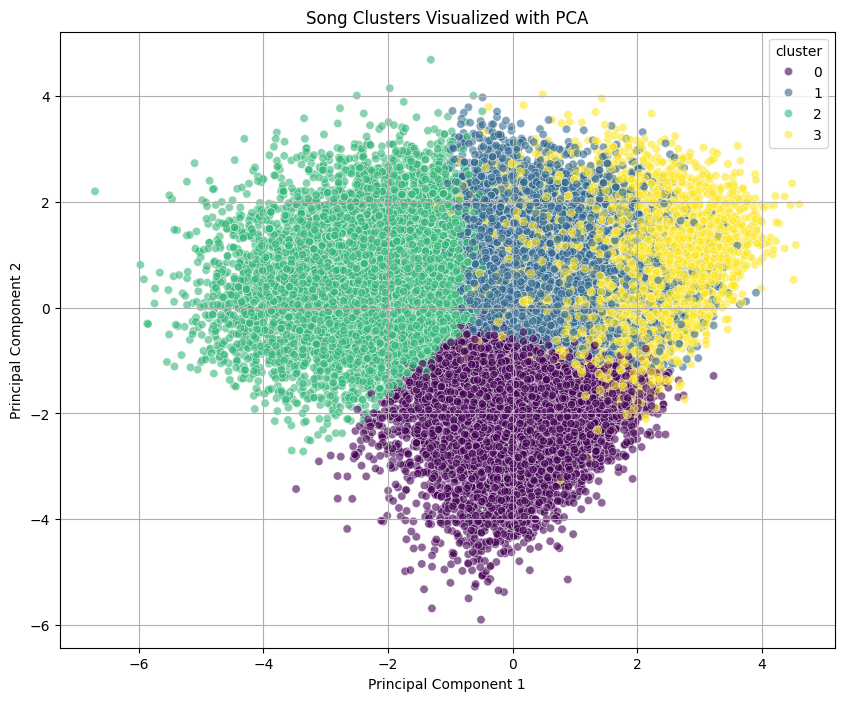

In [29]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add the PCA components and cluster labels to a new DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PCA_1', 'PCA_2'])
pca_df['cluster'] = data['cluster']

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster', data=pca_df, palette='viridis', legend='full', alpha=0.6)
plt.title('Song Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [28]:
# Try a different sample song title from the dataset
sample_song_title = 'patricia' # This song is present in the head of the dataframe

# Generate recommendations for the new sample song title
cluster_recommended_songs = get_cluster_recommendations(sample_song_title, data, top_n=10)

# Display the recommended songs
if not cluster_recommended_songs.empty:
    print(f"Recommended songs from the same cluster as '{sample_song_title}':")
    display(cluster_recommended_songs[['track_name', 'artist_name', 'genre']])

Recommended songs from the same cluster as 'patricia':


,track_name,artist_name,genre
25689,wrapped around your finger,the police,rock
15266,mind your own business,taj mahal,blues
21553,follow fashion monkey,bunny wailer,reggae
24280,live without limit,jahmiel,reggae
9540,one more reason,marshall crenshaw,country
16592,year in review,the black keys,blues
2732,if only you were lonely,the replacements,pop
14081,dedicate this heart,the doobie brothers,blues
3491,meet me half way,kenny loggins,pop
3860,if my homie calls,2pac,pop
